<a href="https://colab.research.google.com/github/astanwar99/machine-learning-exercises/blob/master/Perceptron_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
breast_dataset = sklearn.datasets.load_breast_cancer()

data = pd.DataFrame(breast_dataset.data, columns=breast_dataset.feature_names)
data['class'] = breast_dataset.target

In [0]:
X = data.drop('class', axis=1)
Y = data['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, random_state = 1)


In [0]:
X_binarized_train = X_train.apply(pd.cut, bins = 2, labels=[1, 0])
X_binarized_test = X_test.apply(pd.cut, bins = 2, labels=[1, 0])
X_binarized_test = X_binarized_test.values
X_binarized_train = X_binarized_train.values

In [0]:
X_train = X_train.values
X_test = X_test.values

In [0]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y, epoch = 2, lr = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0

    accuracy = {}
    max_accuracy = 0

    wt_matrix = []
    
    for i in range(epoch):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b + lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b - lr * 1
      
      wt_matrix.append(self.w)
        
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
    print(max_accuracy)
    plt.plot(list(accuracy.values()))
    plt.ylim([0, 1])
    plt.show()

    return np.array(wt_matrix)


In [0]:
perceptron = Perceptron()

0.9154929577464789


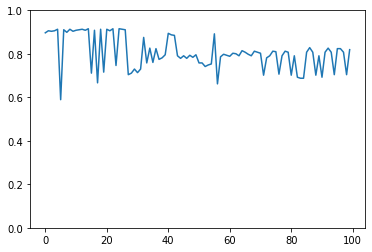

In [60]:
wt_matrix = perceptron.fit(X_train, Y_train, 100)

In [53]:
Y_pred_train = perceptron.predict(X_train)
print(accuracy_score(Y_pred_train, Y_train))

0.9507042253521126


In [54]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9370629370629371


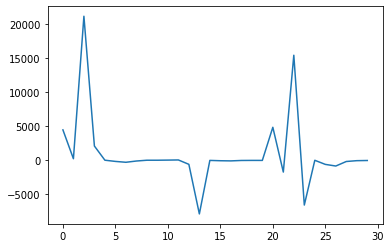

In [61]:
plt.plot(wt_matrix[-1, :])
plt.show()

In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

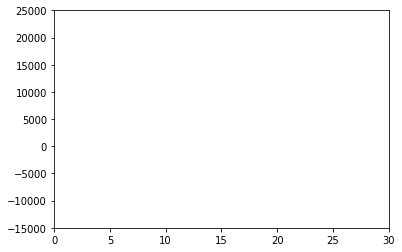

In [66]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [0]:
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=True)

In [71]:
HTML(anim.to_html5_video())